In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [4]:
# reading the 2012 to 2014
df_1= pd.read_csv("DateFromMar2012toDec2014.csv")

In [5]:
df_1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0


In [6]:
# reading the 2015 to 2016
df_2= pd.read_csv("DateFromJan2015toDec2016.csv")

In [10]:
df_2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [11]:
# reading the 2017 to onwards
df_3= pd.read_csv("DatefromJan2017onwards.csv")

In [12]:
df_3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [13]:
#df_1 does not have a "remaining_lease" column so, I choose the df_2 and df_3 only

#concadinating the df_2 and df_3

df_4= pd.concat([df_2,df_3],axis= 0)
df_4.reset_index(drop= True, inplace= True)

In [14]:
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [15]:
df_4.tail(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
225566,2024-08,YISHUN,EXECUTIVE,824,YISHUN ST 81,04 TO 06,146.0,Maisonette,1987,62 years 04 months,1000000.0
225567,2024-08,YISHUN,EXECUTIVE,824,YISHUN ST 81,01 TO 03,142.0,Apartment,1987,62 years 04 months,858888.0


In [16]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225568 entries, 0 to 225567
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                225568 non-null  object 
 1   town                 225568 non-null  object 
 2   flat_type            225568 non-null  object 
 3   block                225568 non-null  object 
 4   street_name          225568 non-null  object 
 5   storey_range         225568 non-null  object 
 6   floor_area_sqm       225568 non-null  float64
 7   flat_model           225568 non-null  object 
 8   lease_commence_date  225568 non-null  int64  
 9   remaining_lease      225568 non-null  object 
 10  resale_price         225568 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 18.9+ MB


In [17]:
df_4.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

In [ ]:
# This Dataset have not any null values

## Encoding the catogarical columns and changing the datatype


In [18]:
df_4.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [19]:
# Creating a new column "address"
df_4["address"]= df_4["block"]+" "+df_4["street_name"]

In [20]:
#droping the "street_name" and "block"
df_5= df_4.drop(columns=["block","street_name"])

In [21]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address
0,2015-01,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4
1,2015-01,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10


In [22]:
# for month
df_5["month"] = pd.to_datetime(df_5["month"], format="%Y-%m")

In [23]:
#spliting the month column to "Year", "month", "day"
df_5["year"]= df_5["month"].dt.year
df_5["month"]= df_5["month"].dt.month

In [25]:
df_5.tail()

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
225563,8,YISHUN,EXECUTIVE,01 TO 03,146.0,Maisonette,1988,63 years 01 month,868000.0,356 YISHUN RING RD,2024
225564,8,YISHUN,EXECUTIVE,01 TO 03,146.0,Maisonette,1987,62 years 03 months,770000.0,643 YISHUN ST 61,2024
225565,8,YISHUN,EXECUTIVE,01 TO 03,145.0,Apartment,1987,62 years 04 months,860888.0,824 YISHUN ST 81,2024
225566,8,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,1987,62 years 04 months,1000000.0,824 YISHUN ST 81,2024
225567,8,YISHUN,EXECUTIVE,01 TO 03,142.0,Apartment,1987,62 years 04 months,858888.0,824 YISHUN ST 81,2024


In [26]:
df_5["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [27]:
df_5["town"].nunique()

26

In [28]:
df_5["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [29]:
df_5["flat_type"].nunique()

7

In [30]:
df_5["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [31]:
df_5["flat_model"].nunique()

21

In [32]:
# choosing the "LabelEncoder" for "town",and "OrdinalEncoder" for the "flat_model" and the "flat_type"
df_5["town"]= LabelEncoder().fit_transform(df_5["town"])
df_5["flat_model"]= OrdinalEncoder().fit_transform(df_5[["flat_model"]])
df_5["flat_type"]= OrdinalEncoder().fit_transform(df_5[["flat_type"]])

In [33]:
df_5["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [34]:
df_5["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [35]:
df_5["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [36]:
df_5.head(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,0,2.0,07 TO 09,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,0,2.0,01 TO 03,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015


In [37]:
df_5.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
225566,8,25,5.0,04 TO 06,146.0,7.0,1987,62 years 04 months,1000000.0,824 YISHUN ST 81,2024
225567,8,25,5.0,01 TO 03,142.0,3.0,1987,62 years 04 months,858888.0,824 YISHUN ST 81,2024


In [38]:
df_5[["storey_start", "storey_end"]]= df_5["storey_range"].str.split(" TO ",expand=True)

In [39]:
#droping the "storey_range" column
df_5.drop(columns=["storey_range"],inplace= True)

In [40]:
df_5.head(2)

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,storey_start,storey_end
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,07,09
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,01,03


In [41]:
df_5["address"].nunique()

9596

In [44]:
# Address have 9559 unique values in the 207823 , so encode it for the correlation checking
# chooshing the "LabelEncoder" for the "address" column

df_5["address"]= LabelEncoder().fit_transform(df_5["address"])

In [46]:
df_5["storey_start"].unique()

array(['07', '01', '13', '10', '04', '19', '16', '22', '25', '28', '34',
       '46', '31', '37', '43', '40', '49'], dtype=object)

In [47]:
df_5["storey_start"]= df_5["storey_start"].astype(int)
df_5["storey_end"]= df_5["storey_end"].astype(int)

In [51]:
df_5["storey_start"]

0         7
1         1
2         1
3         1
4         7
         ..
225563    1
225564    1
225565    1
225566    4
225567    1
Name: storey_start, Length: 225568, dtype: int64

In [52]:
# "remaining_lease" have a "60 years 8 months" this type of data ,
# so we want to split the year and month separately for the correlation checking
slice_values= []
for i in df_5["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    slice_values.append(n)

In [53]:
df_data= pd.DataFrame(slice_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [54]:
df_data["remaining_lease_year"]= df_data["remaining_lease_year"].astype(int)
df_data["remaining_lease_month"]= df_data["remaining_lease_month"].fillna(0).astype(int)

In [55]:
#droping the "remaining_lease" column
df_5.drop(columns=["remaining_lease"],inplace= True)

In [56]:
# concat df_5 and df data

df_6= pd.concat([df_5,df_data],axis=1)

In [57]:
df_6.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'storey_start', 'storey_end', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [58]:
# set the columns
df_7= df_6[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'storey_start', 'storey_end', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [59]:
df_8=df_7.sort_values(by=["year","month"])

In [60]:
df_8.head()

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1638,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6601,1,3,65,0,1981,275000.0
2,2015,1,0,2.0,69.0,12.0,1469,1,3,64,0,1980,285000.0
3,2015,1,0,2.0,68.0,12.0,5438,1,3,63,0,1979,290000.0
4,2015,1,0,2.0,68.0,12.0,6755,7,9,64,0,1980,290000.0


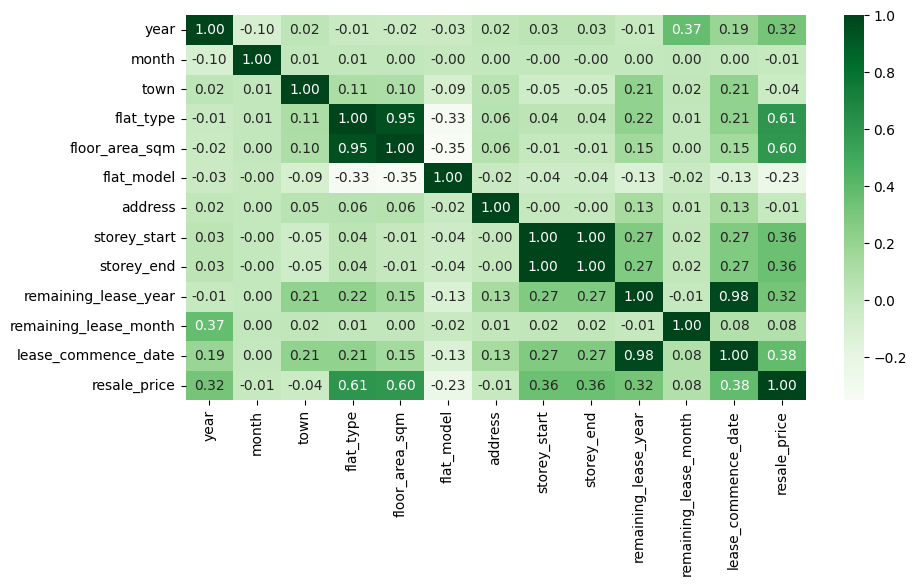

In [62]:
# Checking the Correlation using heatmap

df_8_corr= df_8.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_8_corr,annot= True, cmap="Greens", fmt=".2f")
plt.show()

In [61]:
df_8.to_csv("SingaporeResaleFlatPrices.csv", index= False)

In [63]:
df_final= pd.read_csv("SingaporeResaleFlatPrices.csv")
df_final.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1638,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6601,1,3,65,0,1981,275000.0


In [64]:
# checking the duplicate values
df_final.duplicated().sum()

np.int64(315)

In [65]:
df_final_1= df_final.drop_duplicates()
df_final_1.reset_index(drop= True, inplace= True)

In [67]:
df_final_1.duplicated().sum()

np.int64(0)

In [66]:
df_final_1.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
225251,2024,8,25,5.0,146.0,7.0,8879,4,6,62,4,1987,1000000.0
225252,2024,8,25,5.0,142.0,3.0,8879,1,3,62,4,1987,858888.0


In [68]:
# The month,address column does have very lowest correlation with other features
# So I drop the month and address columns
df_final_2= df_final_1.drop(columns=["month","address"])


In [69]:
df_final_2.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
225251,2024,25,5.0,146.0,7.0,4,6,62,4,1987,1000000.0
225252,2024,25,5.0,142.0,3.0,1,3,62,4,1987,858888.0


In [70]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)


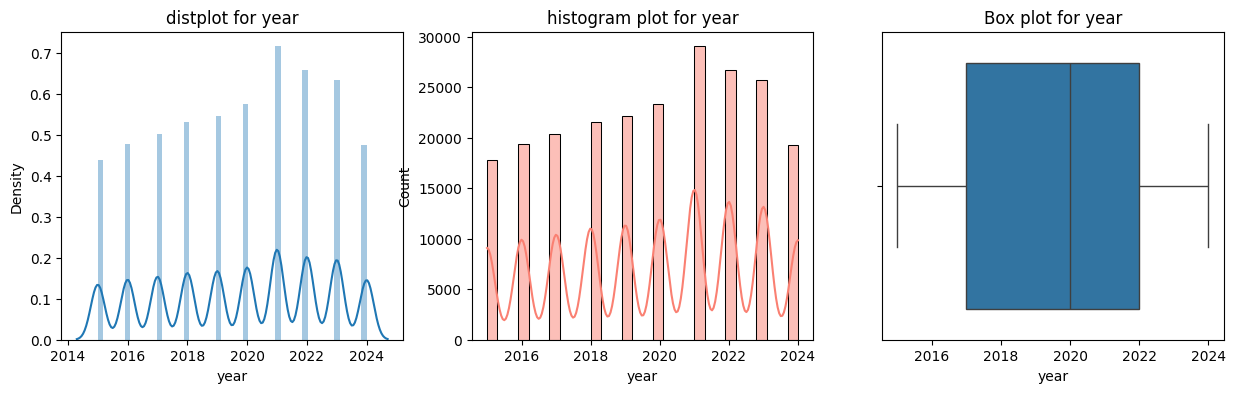

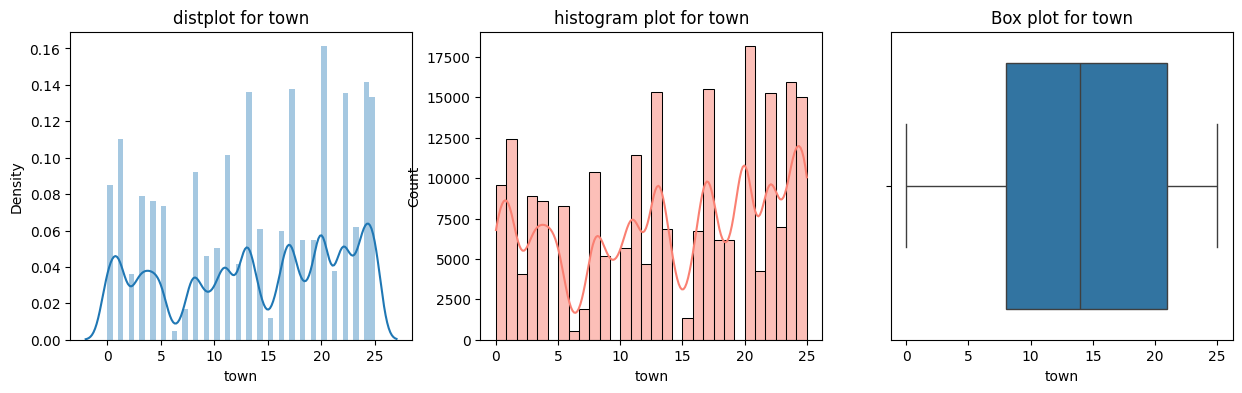

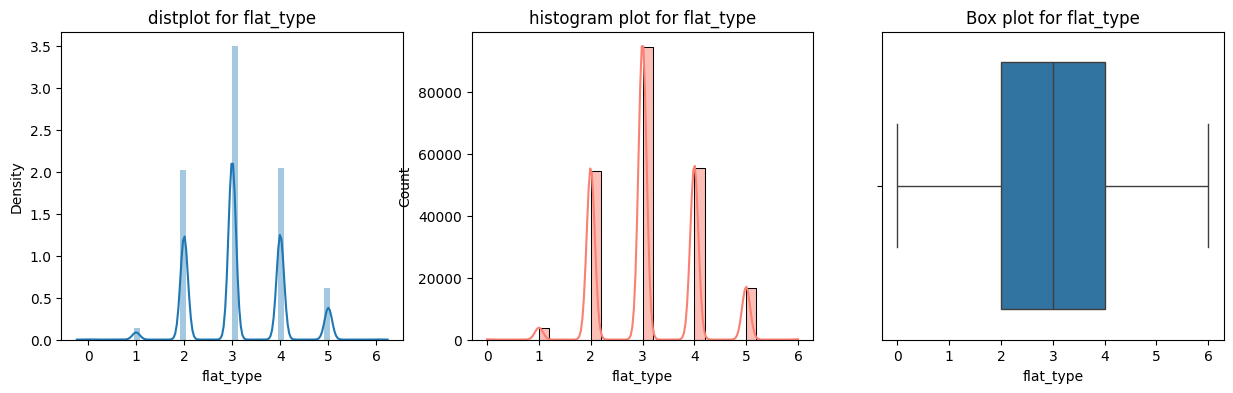

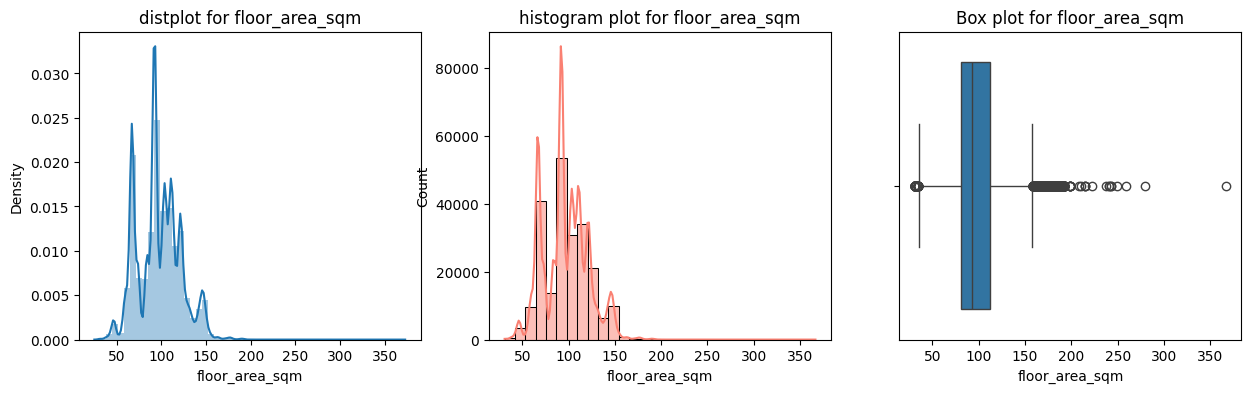

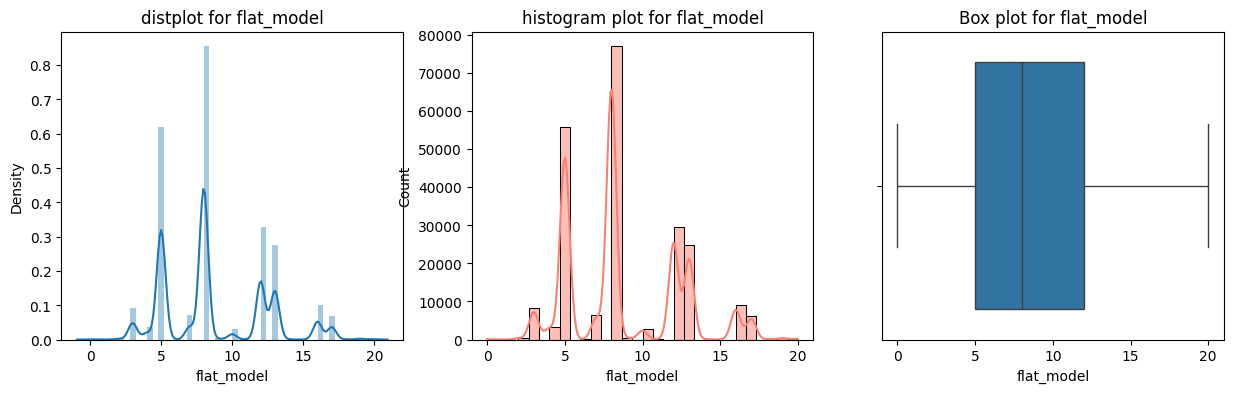

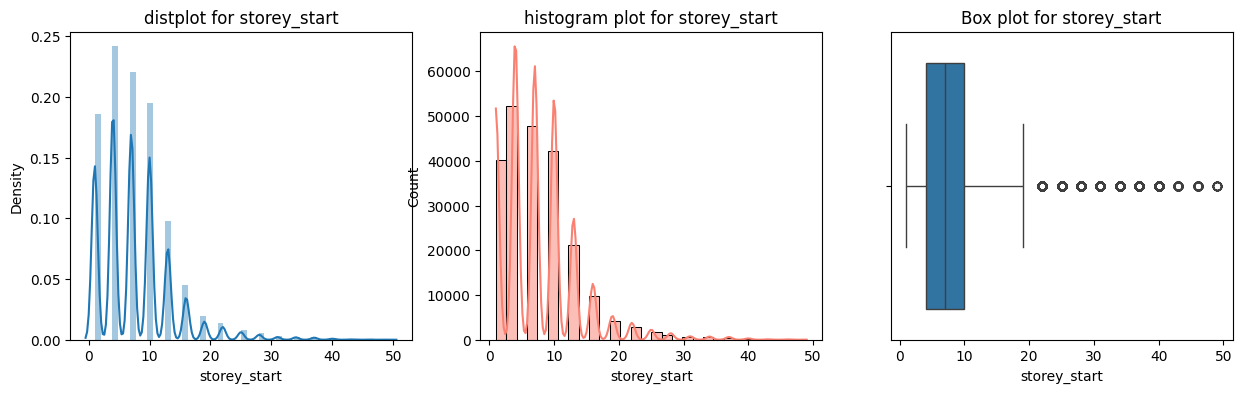

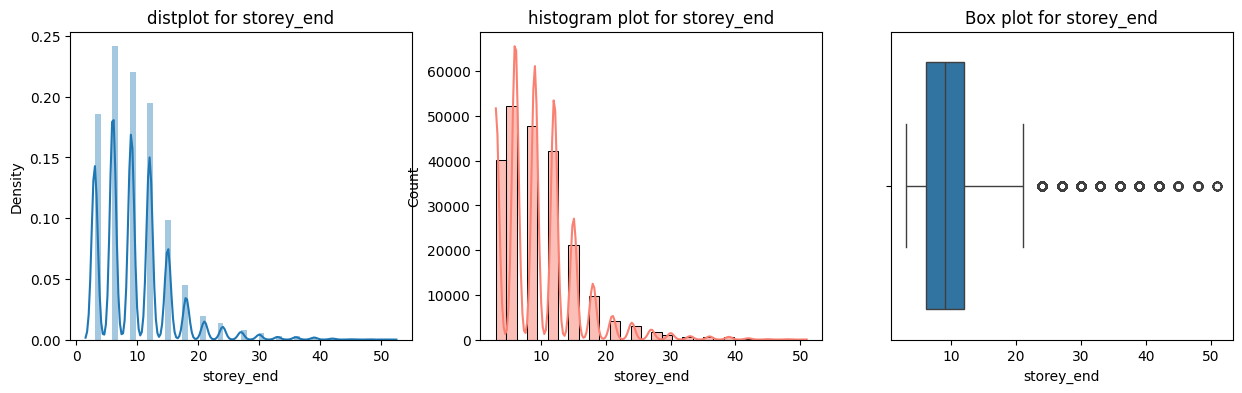

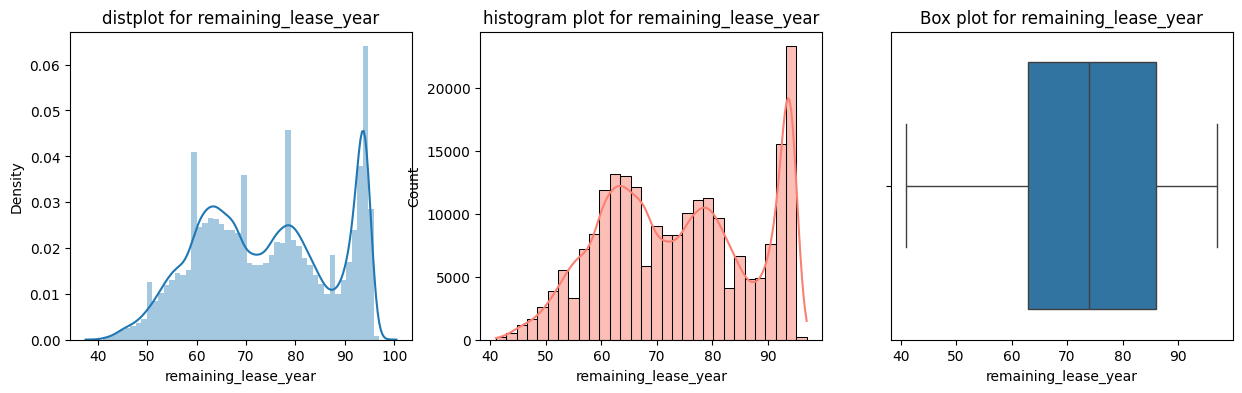

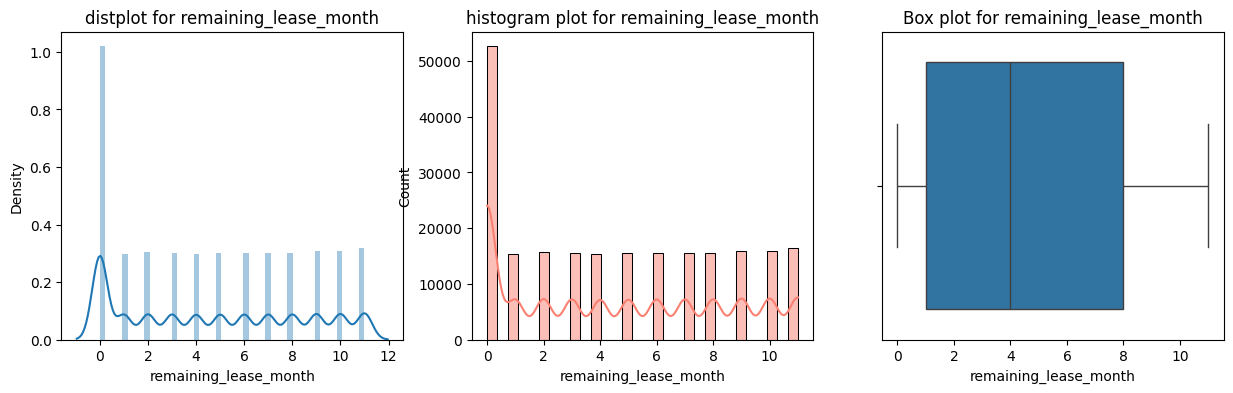

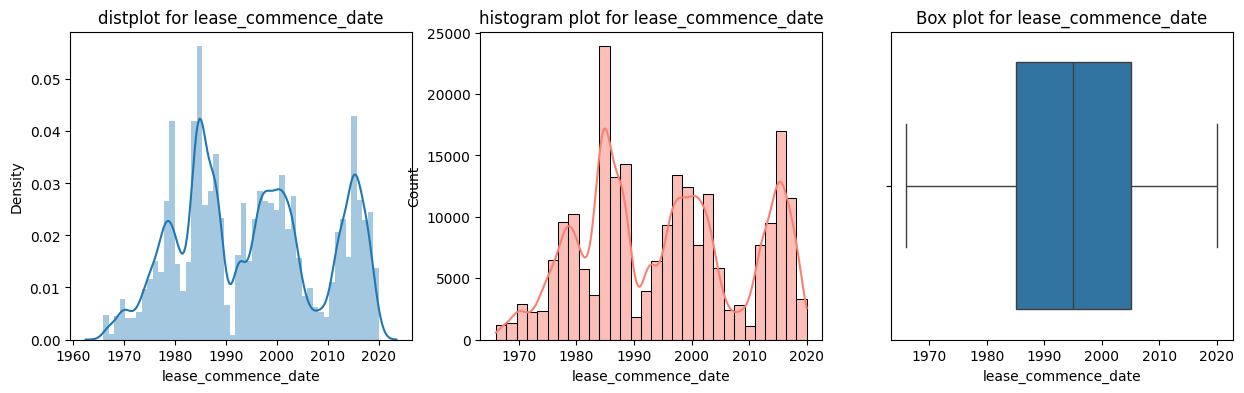

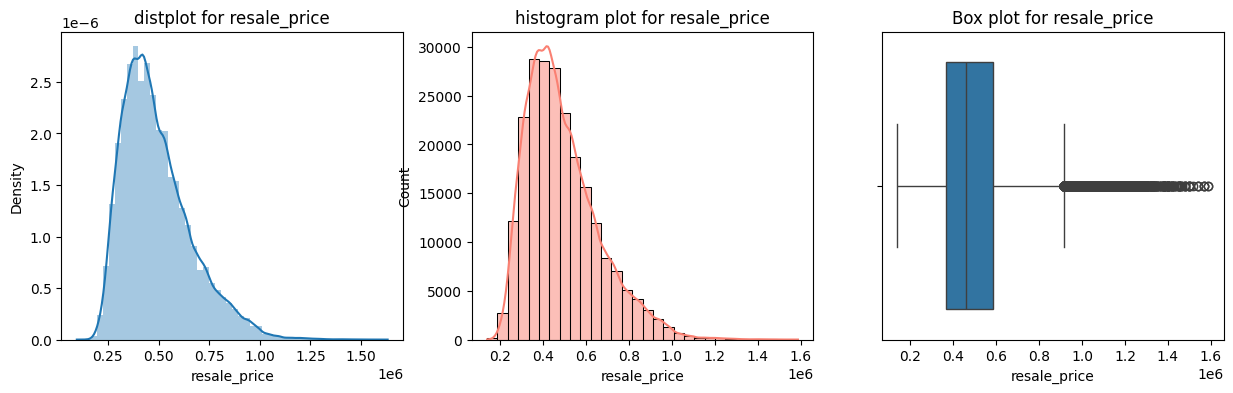

In [71]:
for i in df_final_2.columns:
    plot(df_final_2,i)

## Skewness handling

In [72]:
df_final_3= df_final_2.copy()

In [73]:
# The Skewness Columns are
# 2. storey_start
# 3. storey_end
# 4. resale_price
df_final_3["storey_start"]= np.log(df_final_3["storey_start"])
df_final_3["storey_end"]= np.log(df_final_3["storey_end"])
df_final_3["resale_price"]= np.log(df_final_3["resale_price"])


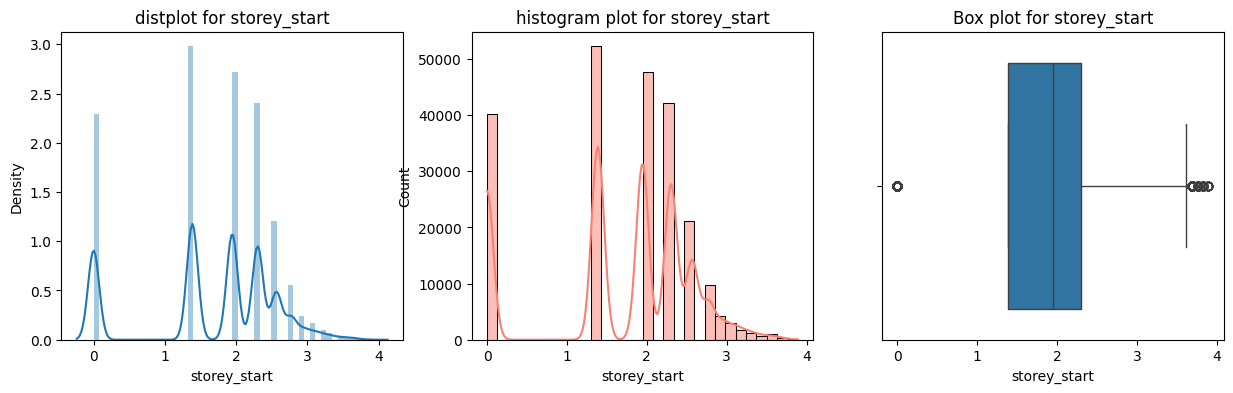

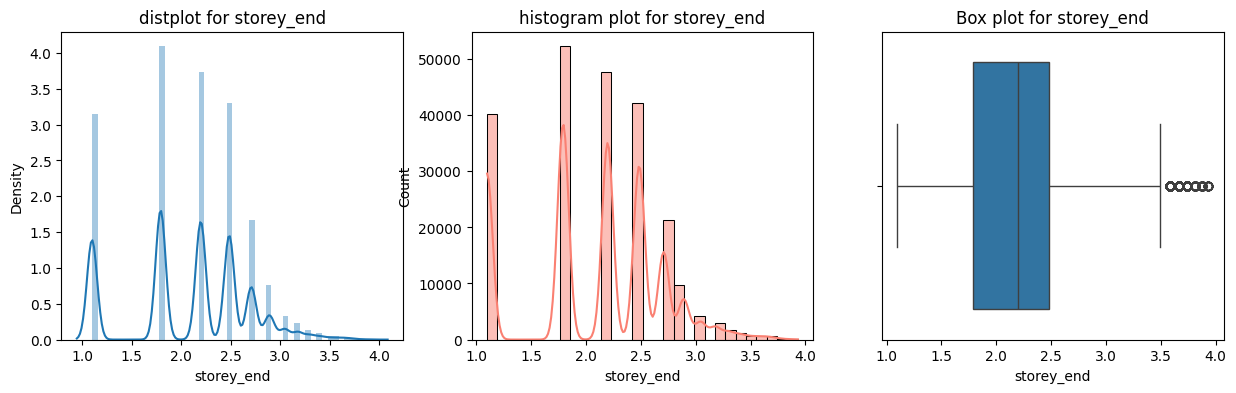

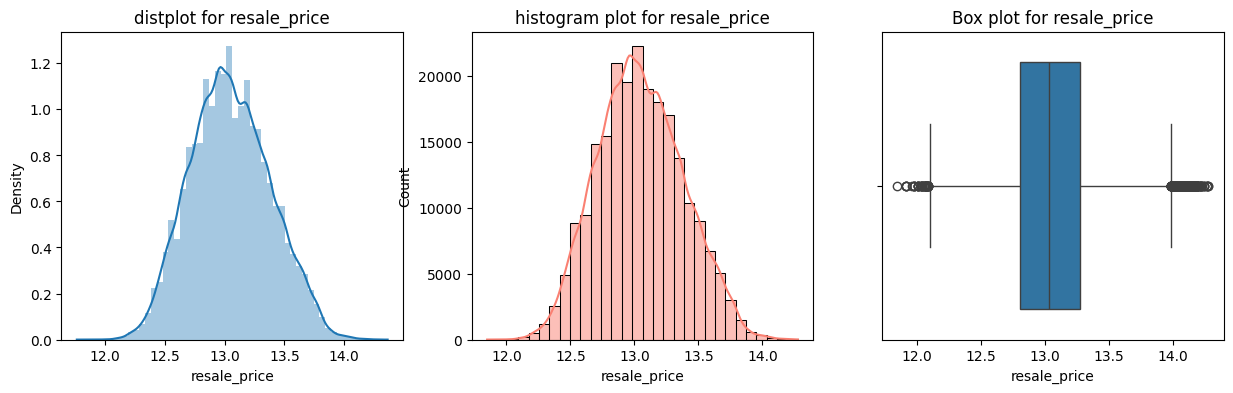

In [74]:
skewed_columns=["storey_start","storey_end","resale_price"]
for i in skewed_columns:
    plot(df_final_3,i)

## Outliers Handling - Interquartile Range(IQR) Method

In [75]:
df_final_4= df_final_3.copy()

In [76]:
# The Outlier Columns are
# 1. floor_area_sqm
# 2. storey_start
# 3. sortey_end
# 4. resale_price

# Recorrect the Outliers


# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features


def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [77]:
outlier_columns=["floor_area_sqm","storey_start","storey_end","resale_price"]
for j in outlier_columns:
    outlier(df_final_4,j)


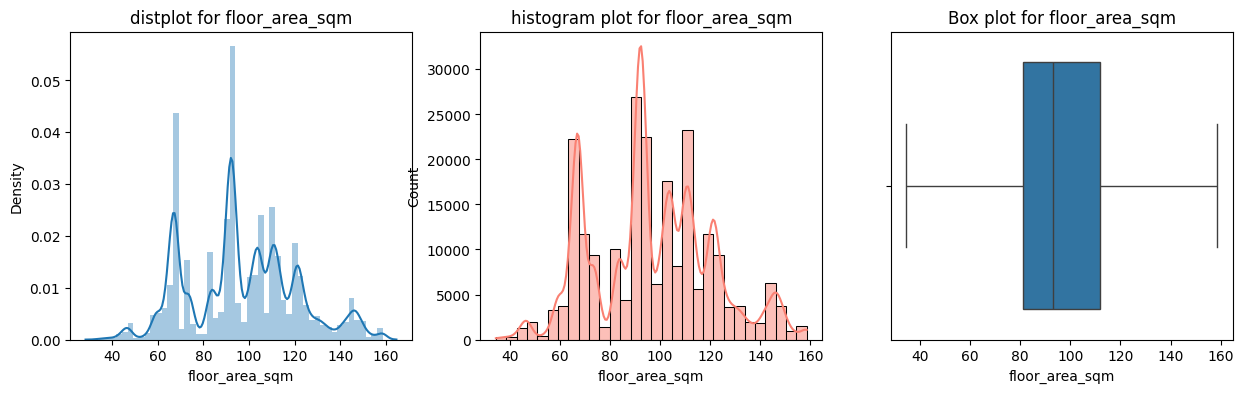

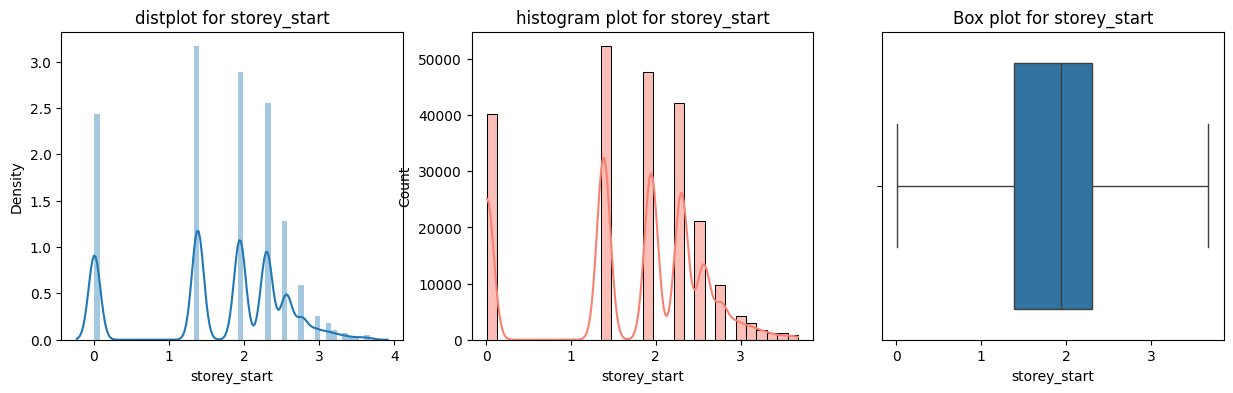

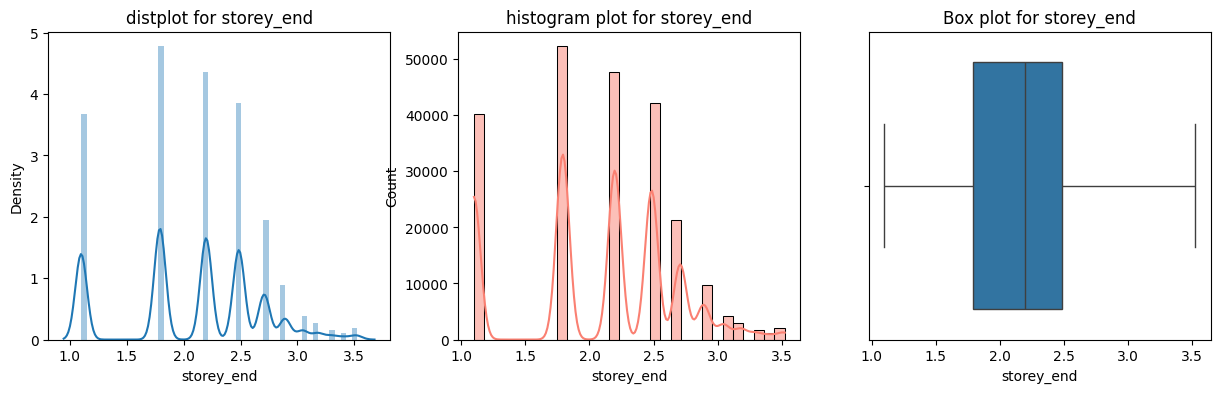

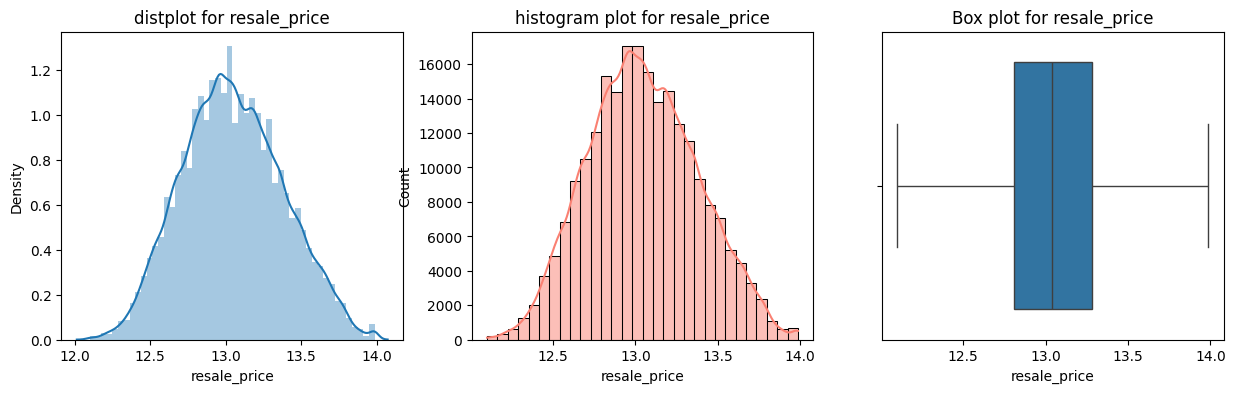

In [78]:
for k in outlier_columns:
    plot(df_final_4,k)

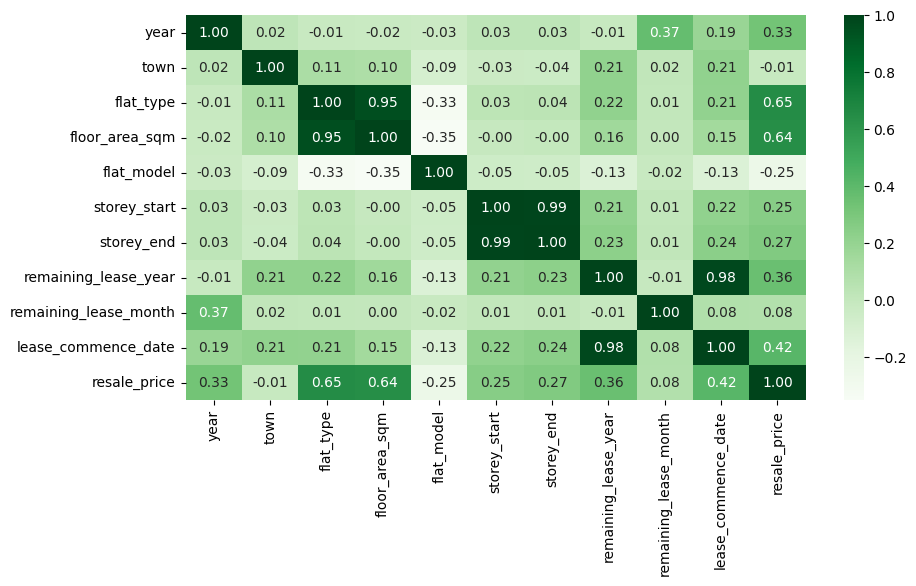

In [79]:
# Checking the correlation after the outlier recorrection
plt.figure(figsize=(10,5))
sns.heatmap(df_final_4.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

## Model Selection (Regression)

In [80]:
df_final_5= df_final_4.copy()

In [81]:
df_final_5.describe().T

,count,mean,std,min,25%,50%,75%,max
year,225253.0,2019.751986,2.752932,2015.000000,2017.000000,2020.000000,2022.000000,2024.000000
town,225253.0,13.889222,7.955989,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,225253.0,3.118769,0.919528,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,225253.0,97.000526,23.828825,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,225253.0,8.687161,3.641781,0.000000,5.000000,8.000000,12.000000,20.000000
storey_start,225253.0,1.695778,0.921120,0.011858,1.386294,1.945910,2.302585,3.677021
storey_end,225253.0,2.093549,0.601492,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,225253.0,74.054756,13.540406,41.000000,63.000000,74.000000,86.000000,97.000000
remaining_lease_month,225253.0,4.633221,3.777252,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,225253.0,1995.241573,13.746250,1966.000000,1985.000000,1995.000000,2005.000000,2020.000000


In [82]:
np.exp(13.986939)

np.float64(1186999.2004467961)

In [83]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] >= 1186999]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
83922,2019,4,4,4.0,112.0,5.0,9594,34,36,95,10,2016,1200000.0
87951,2019,6,7,4.0,106.0,20.0,1944,40,42,90,7,2011,1188000.0
90465,2019,7,14,4.0,119.0,4.0,8691,37,39,90,7,2011,1205000.0
91939,2019,8,7,4.0,106.0,20.0,1944,40,42,90,5,2011,1200000.0
105234,2020,3,7,4.0,107.0,20.0,1943,40,42,89,11,2011,1232000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224380,2024,8,18,3.0,95.0,14.0,9289,34,36,90,9,2016,1380000.0
224401,2024,8,18,4.0,117.0,5.0,7331,22,24,86,2,2011,1210000.0
224723,2024,8,21,5.0,150.0,3.0,3920,7,9,60,4,1985,1230000.0
224952,2024,8,23,4.0,159.0,9.0,684,10,12,58,10,1984,1250000.0


In [84]:
np.exp(12.100081)

np.float64(179886.43246467912)

In [85]:
#checking how many datas are outliers based on resale_price
df_final_1[df_final_1["resale_price"] <= 179886]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8088,4,6,56,8,1975,175000.0
62989,2018,4,21,2.0,64.0,5.0,3561,13,15,59,2,1978,170000.0
65495,2018,6,4,0.0,31.0,5.0,8088,1,3,55,10,1975,176000.0
65810,2018,6,10,1.0,42.0,17.0,5212,4,6,51,7,1971,178000.0
66004,2018,6,13,1.0,56.0,5.0,416,1,3,51,3,1970,175000.0
66007,2018,6,13,2.0,59.0,5.0,1808,1,3,56,4,1975,175000.0
70007,2018,8,4,0.0,31.0,5.0,8088,7,9,55,7,1975,168000.0
72361,2018,9,10,1.0,47.0,17.0,4675,4,6,51,4,1971,160000.0
76004,2018,11,4,0.0,31.0,5.0,8088,1,3,55,4,1975,168000.0
79281,2019,1,4,0.0,31.0,5.0,8088,7,9,55,2,1975,172000.0


## Create the model for "resale_price" prediction

In [86]:

# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [87]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [88]:
select_model(df_final_5, LinearRegression)
select_model(df_final_5, DecisionTreeRegressor)
select_model(df_final_5, RandomForestRegressor)
select_model(df_final_5, AdaBoostRegressor)
select_model(df_final_5, ExtraTreesRegressor)
select_model(df_final_5, GradientBoostingRegressor)
select_model(df_final_5, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6801172419415833, 'Mean_squared_error': np.float64(0.03553461284029192), 'Root_mean_squared_error': np.float64(0.1885062673766894), 'Mean_absolute_error': np.float64(0.14745830715585295)}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6816044053509658, 'Mean_squared_error': np.float64(0.03551161434097057), 'Root_mean_squared_error': np.float64(0.18844525555441974), 'Mean_absolute_error': np.float64(0.14739237861567026)}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9963159743912424, 'Mean_squared_error': np.float64(0.0004092450136903408), 'Root_mean_squared_error': np.float64(0.02022980508285586), 'Mean_absolute_error': np.float64(0.007183491653494389)}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9267550824208668, 'Mean_squared_error': np.float64(0.00816922504337246), 'Root_mean_squared_error': np.float64(0.09038376537505206), 'Mean_absolute_error': np.flo

In [89]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# so i select the algorithm

#x,y spliting
x= df_final_5.drop(columns=["resale_price"])
y= df_final_5["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.9564295569976452, 'Mean_squared_error': np.float64(0.004859542011786926), 'Root_mean_squared_error': np.float64(0.06971041537522873), 'Mean_absolute_error': np.float64(0.051197613535897475)}


In [90]:
df_final_5.iloc[10456]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             74.000000
flat_model                  8.000000
storey_start                0.011858
storey_end                  1.098612
remaining_lease_year       68.000000
remaining_lease_month       0.000000
lease_commence_date      1985.000000
resale_price               12.815838
Name: 10456, dtype: float64

In [91]:
np.exp(12.815838)

np.float64(367999.92008841544)

In [94]:
df_final_5.head()

,year,town,flat_type,floor_area_sqm,flat_model,storey_start,storey_end,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,0,2.0,60.0,5.0,1.945910,2.197225,70,0,1986,12.449019
1,2015,0,2.0,68.0,12.0,0.011858,1.098612,65,0,1981,12.524526
2,2015,0,2.0,69.0,12.0,0.011858,1.098612,64,0,1980,12.560244
3,2015,0,2.0,68.0,12.0,0.011858,1.098612,63,0,1979,12.577636
4,2015,0,2.0,68.0,12.0,1.945910,2.197225,64,0,1980,12.577636


In [97]:
user_data = np.array([[2015,0,2,60,5,1.945910,2.197225,70,0,1986]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

np.float64(12.474574135494937)

In [98]:
np.exp(12.474574135494937)

np.float64(261600.58518147867)

In [99]:
# Saving the Model unsing pickle
with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [100]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [101]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

np.float64(12.26993138518095)

In [102]:
np.exp(12.26993138518095)

np.float64(213188.36256262273)